## library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url1 = 'https://raw.githubusercontent.com/abil223/Malin2-classification/main/kendaraan_train.csv'
url2 = 'https://raw.githubusercontent.com/abil223/Malin2-classification/main/kendaraan_test.csv'

df_test = pd.read_csv(url2)
df_train = pd.read_csv(url1)

In [4]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [5]:
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Pre Processing

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [7]:
df_train.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [8]:
#remove unused value
df_train=df_train.drop(['id'],axis=1)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [9]:
#handling missing value
df_train['Jenis_Kelamin']=df_train['Jenis_Kelamin'].fillna(df_train['Jenis_Kelamin'].mode()[0])
df_train['Kode_Daerah'].fillna(df_train['Kode_Daerah'].mean(),inplace=True)
df_train['Umur'].fillna(df_train['Umur'].mean(),inplace=True)
df_train['Sudah_Asuransi'].fillna(df_train['Sudah_Asuransi'].mean(),inplace=True)
df_train['SIM'].fillna(df_train['SIM'].median(),inplace=True)
df_train['Umur_Kendaraan']=df_train['Umur_Kendaraan'].fillna(df_train['Umur_Kendaraan'].mode()[0])
df_train['Kendaraan_Rusak']=df_train['Kendaraan_Rusak'].fillna(df_train['Kendaraan_Rusak'].mode()[0])
df_train['Premi'].fillna(df_train['Premi'].median(),inplace=True)
df_train['Kanal_Penjualan'].fillna(df_train['Kanal_Penjualan'].mean(),inplace=True)
df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].mean(),inplace=True)

In [10]:
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

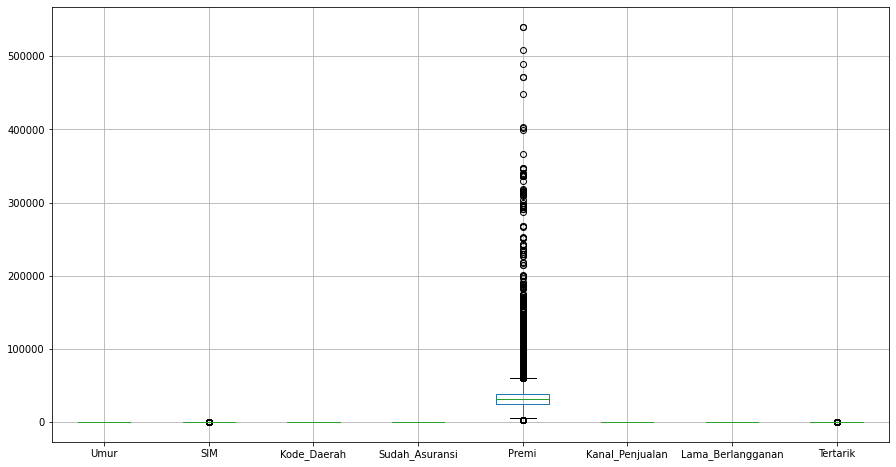

In [11]:
#mencari outliers for data train
df_train.boxplot(figsize=[15,8])

In [12]:
def interquartile(data,x):
  q1 = (df_train[x]).quantile(0.25)
  q3 = (df_train[x]).quantile(0.75) 
  iqr = q3 - q1 #range q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum
  
max,min = interquartile(df_train,'Premi')
print('max: ',max,' | min:',min)

max:  59719.0  | min: 4055.0


above:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool  | below:  0         False
1         False
2         False
3          True
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool


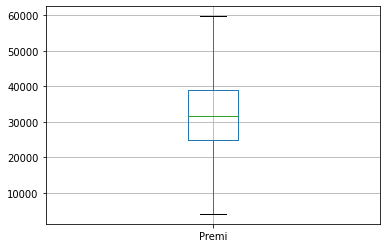

In [13]:
def outliersFix(data,x,max,min):
  above = (df_train[x] > max)
  below = (df_train[x] < min)
  print('above: ',above,' | below: ',below)
  data[x] = df_train[x].mask(above, max,axis=0)
  data[x] = df_train[x].mask(below, min,axis=0)
  return df_train
  
max,min = interquartile(df_train,'Premi')
df_train = outliersFix(df_train,'Premi',max,min)
boxplot = df_train.boxplot(column=['Premi'])

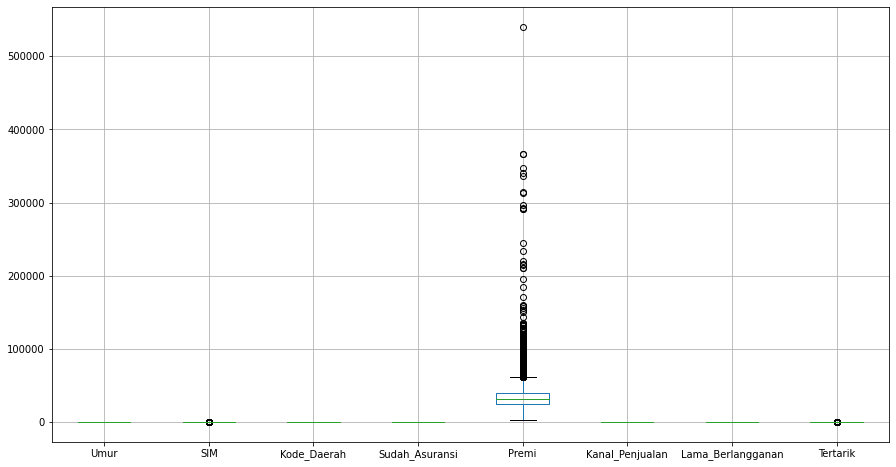

In [14]:
#mencari outliers for data test
df_test.boxplot(figsize=[15,8])

In [15]:
#fixing outlier for data_test
max,min = interquartile(df_test,'Premi')
print('max: ',max,' | min:',min)

max:  59719.0  | min: 4055.0


above:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool  | below:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool


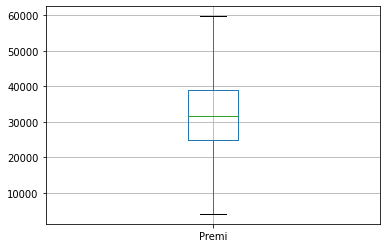

In [16]:
max,min = interquartile(df_test,'Premi')
df_test = outliersFix(df_test,'Premi',max,min)
boxplot = df_test.boxplot(column=['Premi'])

# labeling

In [17]:
replace_values = {'Wanita' : 0, 'Pria' : 1}
df_train = df_train.replace({"Jenis_Kelamin": replace_values})
df_test = df_test.replace({"Jenis_Kelamin": replace_values})
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].astype('float')
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].astype('float')

replace_values = {'< 1 Tahun' : 0, '1-2 Tahun' : 1, '> 2 Tahun' : 2 }   
df_train = df_train.replace({"Umur_Kendaraan": replace_values})
df_test = df_test.replace({"Umur_Kendaraan": replace_values}) 
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].astype('float')
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].astype('float')

replace_values = {'Pernah' : 1, 'Tidak' : 0} 
df_train = df_train.replace({"Kendaraan_Rusak": replace_values})
df_test = df_test.replace({"Kendaraan_Rusak": replace_values}) 
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].astype('float')
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].astype('float')



In [18]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,4055.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  float64
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  float64
 6   Kendaraan_Rusak    285831 non-null  float64
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 24.0 MB


In [20]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,4055.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  float64
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  float64
 6   Kendaraan_Rusak    285831 non-null  float64
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 24.0 MB


# Scalling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[['Umur','Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Umur_Kendaraan']]=scaler.fit_transform(df_train[['Umur','Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan','Umur_Kendaraan']])

In [23]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.430691,0.932099,0.301038,0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.390647,0.172840,0.512111,0
2,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.515198,0.981481,0.377163,0
3,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0
4,1.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.553356,0.537037,0.636678,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.394025,0.932099,0.716263,0
285827,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.729933,0.932099,0.138408,0
285828,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.820926,0.932099,0.747405,0
285829,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.475137,0.759259,0.899654,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test[['Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan','Tertarik']]=scaler.fit_transform(df_test[['Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan','Tertarik']])

In [25]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.430691,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.390647,0.172840,0.512111,0.0
2,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.515198,0.981481,0.377163,0.0
3,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
4,1.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.553356,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.394025,0.932099,0.716263,0.0
285827,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.729933,0.932099,0.138408,0.0
285828,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.820926,0.932099,0.747405,0.0
285829,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.475137,0.759259,0.899654,0.0


# Exporting the cleaned file

In [26]:
df_train.to_csv('cleaned_kendaraan_train.csv', index=False)
df_test.to_csv('cleaned_kendaraan_test.csv', index=False)

## Modeling

In [27]:
#split data
X_train = df_train.loc[:, df_train.columns != 'Tertarik']
X_test = df_test.loc[:, df_test.columns  != 'Tertarik']

y_train = df_train['Tertarik']
y_test = df_test['Tertarik']

### Classification

Linear Regression

In [28]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    pred = X.dot(self.w) + self.b
    pred_hasil = [1 if i>0.5 else 0 for i in pred]
    return np.array(pred_hasil)

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


regressor = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy


print("Accuracy: ",accuracy(y_test, predictions))


print("pred", predictions)


MSE: 0.12645934135905482
Accuracy:  0.8735406586409452
pred [0 1 0 ... 0 0 0]


naive bayes

In [31]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred

Accuracy: 0.6849711892691835


array([0, 1, 0, ..., 0, 0, 1])

eksperimen 1

In [33]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
import seaborn as sns

restLROVR = predictions

conf_matrix = confusion_matrix(y_test, restLROVR) 
print(conf_matrix)

[[247683   3142]
 [ 33004   2002]]


In [35]:
prediksi = metrics.accuracy_score(y_test, y_pred)

resultNB = prediksi

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[164466  86359]
 [  3686  31320]]


eksperimen 2

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("sebelum oversampling: ",Counter(y_train))
SMOTE = SMOTE()

# fit dan transform data training
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print("Setelah oversampling: ",Counter(y_train_SMOTE))

sebelum oversampling:  Counter({0: 250825, 1: 35006})
Setelah oversampling:  Counter({0: 250825, 1: 250825})


In [37]:
regres_eksperimen = Linear_Regression(learning_rate=0.0001,no_of_iterations=1000)
regres_eksperimen.fit(X_train_SMOTE, y_train_SMOTE)

pred_eks = regres_eksperimen.predict(X_train_SMOTE)

pred_eks

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
print("Accuracy: ",accuracy(y_train_SMOTE, pred_eks))
print()
print("Confusion Matrix")
print(confusion_matrix(y_train_SMOTE, pred_eks))
print("Classification Report")
print(classification_report(y_train_SMOTE,pred_eks))

Accuracy:  0.5731506030100668

Confusion Matrix
[[222610  28215]
 [185914  64911]]
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.89      0.68    250825
           1       0.70      0.26      0.38    250825

    accuracy                           0.57    501650
   macro avg       0.62      0.57      0.53    501650
weighted avg       0.62      0.57      0.53    501650

